## Exercises

#### Exercise 1
In this notebook, start by loading in data from the file "myhousedata.csv" that we created in notebook 2.

In [24]:
using DataFrames

In [25]:
myhouses = readtable("myhousedata.csv")

,square_footage,price
1,836,59222
2,1167,68212
3,796,68880
4,852,69307
5,797,81900
6,1122,89921
7,1104,90895
8,1177,91002
9,941,94905
10,1146,98937


In [26]:
myhouses2, header = readcsv("myhousedata.csv", header = true)

([836.0 59222.0; 1167.0 68212.0; … ; 1685.0 235301.0; 1362.0 235738.0], AbstractString["square_footage" "price"])

You can load in this data with either `readcsv` or `readtable` and work with it thereafter.

Create a scatter plot that plots housing prices against house sizes.

In [38]:
# If working with DataFrames
prices1 = [convert(Float64, x) for x in myhouses[:price]]
sizes1 = [convert(Float64, x) for x in myhouses[:square_footage]]

814-element Array{Float64,1}:
  836.0
 1167.0
  796.0
  852.0
  797.0
 1122.0
 1104.0
 1177.0
  941.0
 1146.0
  909.0
 1289.0
  871.0
    ⋮  
  960.0
 1456.0
 1450.0
 1358.0
 1329.0
 1715.0
 1262.0
 2280.0
 1477.0
 1216.0
 1685.0
 1362.0

In [29]:
# If working with `readcsv` output
prices2 = myhouses2[:, 2]
sizes2 = myhouses2[:, 1]

814-element Array{Float64,1}:
  836.0
 1167.0
  796.0
  852.0
  797.0
 1122.0
 1104.0
 1177.0
  941.0
 1146.0
  909.0
 1289.0
  871.0
    ⋮  
  960.0
 1456.0
 1450.0
 1358.0
 1329.0
 1715.0
 1262.0
 2280.0
 1477.0
 1216.0
 1685.0
 1362.0

In [30]:
using Plots; gr()

Plots.GRBackend()

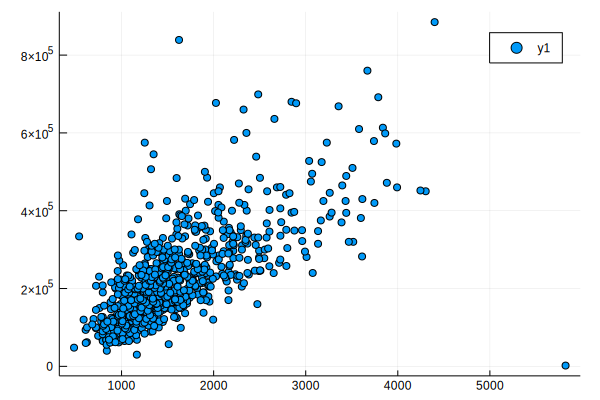

In [31]:
fig1 = scatter(sizes1, prices1)

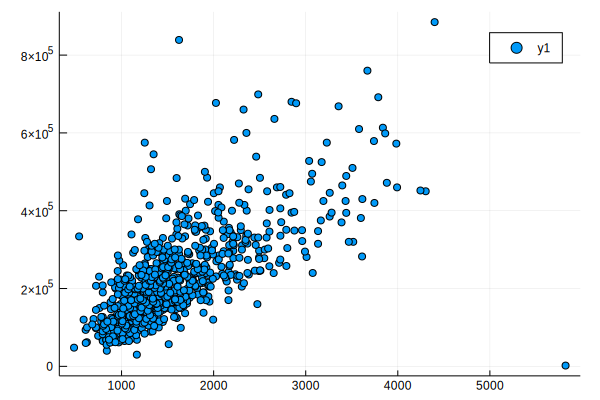

In [32]:
fig2 = scatter(sizes2, prices2)

We can see that prices go up *roughly* with sizes. Fit this data to a straight line.

In [33]:
f(x, p) = p[1] .* x .+ p[2]

f (generic function with 1 method)

In [34]:
using LsqFit

In [36]:
csvfit = curve_fit(f, sizes2, prices2, [1.0, 1.0])

LsqFit.LsqFitResult{Float64,1}(812, [125.216, 30210.6], [75669.6, 1.08126e5, 61003.0, 67588.1, 48108.2, 80782.5, 77554.6, 86588.4, 53134.3, 74771.7  …  -16225.5, -28772.4, -32876.7, 14956.9, -41766.2, 83279.2, -18844.6, -52526.1, 5899.41, -34982.5], [836.0 1.0; 1167.0 1.0; … ; 1685.0 1.0; 1362.0 1.0], true, Float64[])

In [39]:
dffit = curve_fit(f, sizes1, prices1, [1.0, 1.0])

LsqFit.LsqFitResult{Float64,1}(812, [125.216, 30210.6], [75669.6, 1.08126e5, 61003.0, 67588.1, 48108.2, 80782.5, 77554.6, 86588.4, 53134.3, 74771.7  …  -16225.5, -28772.4, -32876.7, 14956.9, -41766.2, 83279.2, -18844.6, -52526.1, 5899.41, -34982.5], [836.0 1.0; 1167.0 1.0; … ; 1685.0 1.0; 1362.0 1.0], true, Float64[])

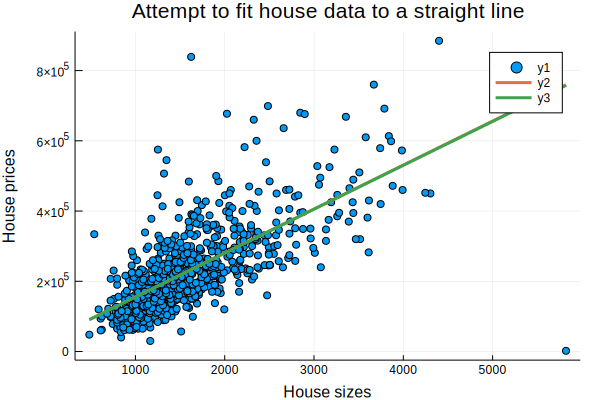

In [51]:
plot!(fig2, sizes2, f(sizes2, [125.0, 30210.0]), linewidth = 3.0)
xlabel!("House sizes")
ylabel!("House prices")
title!("Attempt to fit house data to a straight line")

Given this model, how much would you expect a 2000 $ft^2$ house to cost?

In [50]:
fit.param

2-element Array{Float64,1}:
 428.544  
   2.57525

In [52]:
f(sizes2, [125.0, 30210.0])

814-element Array{Float64,1}:
 134710.0
 176085.0
 129710.0
 136710.0
 129835.0
 170460.0
 168210.0
 177335.0
 147835.0
 173460.0
 143835.0
 191335.0
 139085.0
      ⋮  
 150210.0
 212210.0
 211460.0
 199960.0
 196335.0
 244585.0
 187960.0
 315210.0
 214835.0
 182210.0
 240835.0
 200460.0

In [41]:
f(2000, fit.param)

280643.6072266811

#### Exercise 2

What is the sum of the squares of the residuals for the best fit you can find for the data in "find_model.csv"?

Does your output from `curve_fit` change based on the starting parameters you feed from?

In [42]:
;head -10 find_model.csv

1,3
1.5,5.196152422706632
2,9
2.5,15.588457268119896
3,27
3.5,46.76537180435969
4,81
4.5,140.29611541307906
5,243
5.5,420.8883462392372


In [43]:
B = readcsv("find_model.csv")
xdata, ydata = B[:, 1], B[:, 2]

([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5  …  35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0], [3.0, 5.19615, 9.0, 15.5885, 27.0, 46.7654, 81.0, 140.296, 243.0, 420.888  …  8.66572e16, 1.50095e17, 2.59972e17, 4.50284e17, 7.79915e17, 1.35085e18, 2.33974e18, 4.05256e18, 7.01923e18, 1.21577e19])

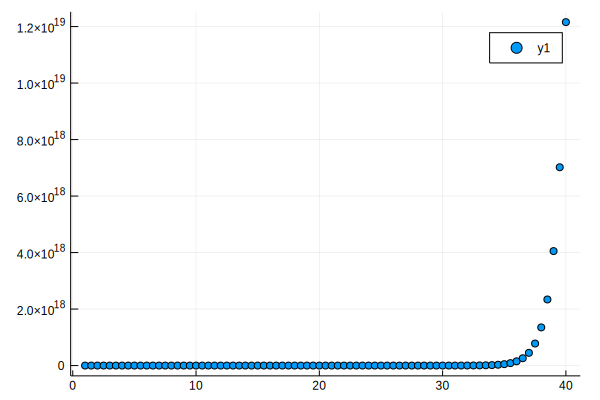

In [44]:
scatter(xdata, ydata)

In [45]:
# f(x) = a * b^x
g(x, p) = p[1] .* p[2].^xdata
fit = curve_fit(g, xdata, ydata, [1.0, 1.0]) # Answer is 1.0, 3.0 (curve_fit won't find the exact answer from any seed)

LsqFit.LsqFitResult{Float64,1}(77, [428.544, 2.57525], [1100.61, 1765.82, 2833.06, 4545.22, 7292.0, 11698.5, 18767.2, 30106.5, 48295.9, 77472.2  …  7.78052e16, 1.13828e17, 1.6356e17, 2.29381e17, 3.10783e17, 3.99454e17, 4.69072e17, 4.54914e17, 2.14165e17, -5.49817e17], [2.57525 428.544; 4.13265 1031.56; … ; 1.6879e16 1.10948e20; 2.70867e16 1.80299e20], false, Float64[])

In [46]:
fit.param

2-element Array{Float64,1}:
 428.544  
   2.57525

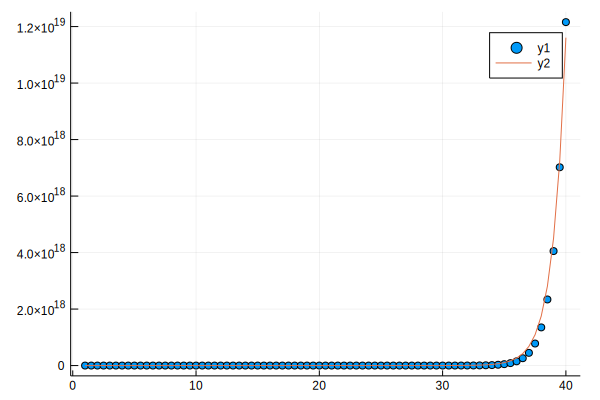

In [47]:
plot!(xdata, g(xdata, fit.param))

In [48]:
fit.resid

79-element Array{Float64,1}:
  1100.61      
  1765.82      
  2833.06      
  4545.22      
  7292.0       
 11698.5       
 18767.2       
 30106.5       
 48295.9       
 77472.2       
     1.24271e5 
     1.99331e5 
     3.19718e5 
     ⋮         
     3.4977e16 
     5.24527e16
     7.78052e16
     1.13828e17
     1.6356e17 
     2.29381e17
     3.10783e17
     3.99454e17
     4.69072e17
     4.54914e17
     2.14165e17
    -5.49817e17

In [49]:
sum(abs2, fit.resid)

1.1345768785885857e36